In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import os
from scipy import stats

In [2]:
src_file = os.path.join('data', 'EPA_fuel_economy.csv')
image_dir = ('image')

In [3]:
data = pd.read_csv(src_file)
data.head(10)

,make,model,year,cylinders,trany,displ,VClass,co2,barrels08,fuelCost08,fuelType,highway08,city08,comb08
0,Acura,NSX,2000,6.0,Automatic 4-spd,3.0,Two Seaters,-1,18.311667,2600,Premium,22,15,18
1,Acura,NSX,2000,6.0,Manual 6-spd,3.2,Two Seaters,-1,18.311667,2600,Premium,22,15,18
2,BMW,M Coupe,2000,6.0,Manual 5-spd,3.2,Two Seaters,-1,17.347895,2500,Premium,23,17,19
3,BMW,Z3 Coupe,2000,6.0,Automatic 4-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
4,BMW,Z3 Coupe,2000,6.0,Manual 5-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
5,BMW,Z3 Roadster,2000,6.0,Automatic 4-spd,2.5,Two Seaters,-1,17.347895,2500,Premium,24,17,19
6,BMW,Z3 Roadster,2000,6.0,Manual 5-spd,2.5,Two Seaters,-1,16.480500,2350,Premium,25,17,20
7,BMW,Z3 Roadster,2000,6.0,Automatic 4-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
8,BMW,Z3 Roadster,2000,6.0,Manual 5-spd,2.8,Two Seaters,-1,17.347895,2500,Premium,24,17,19
9,BMW,Z8,2000,8.0,Manual 6-spd,4.9,Two Seaters,-1,21.974000,3150,Premium,19,12,15


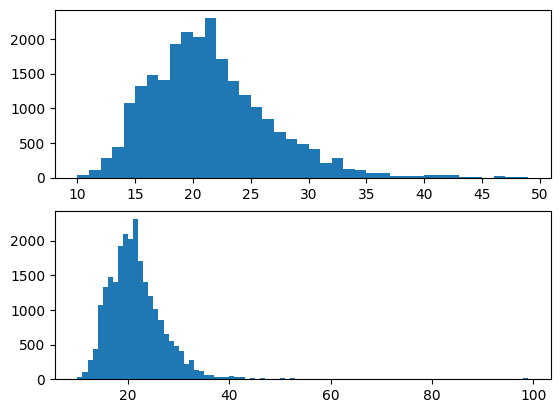

In [4]:
fig, ax = plt.subplots(2)
ax[0].hist(data['comb08'], range(10, 50))
ax[1].hist(data['comb08'], range(10, 100));

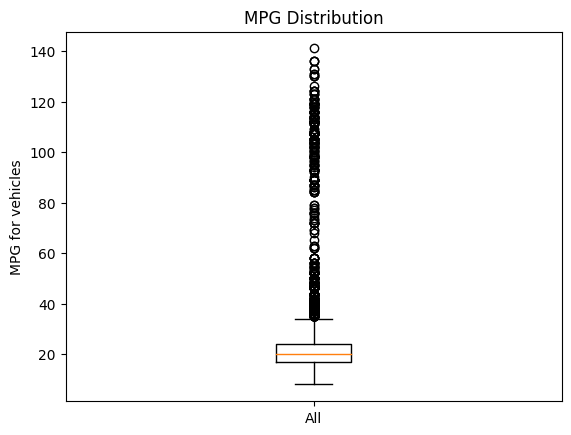

In [5]:
fig, ax = plt.subplots()
ax.boxplot(data['comb08'], labels=['All'])
ax.set(title='MPG Distribution', ylabel='MPG for vehicles');

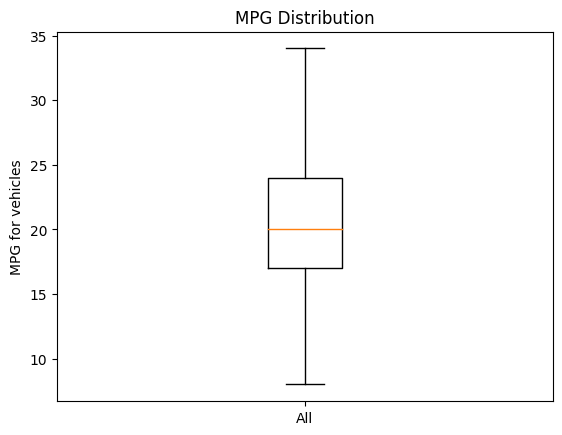

In [6]:
fig, ax = plt.subplots()
ax.boxplot(data['comb08'], labels=['All'], showfliers=False)
ax.set(title='MPG Distribution', ylabel='MPG for vehicles');

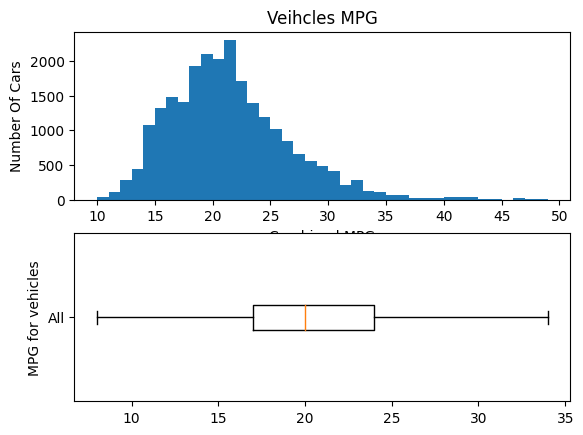

In [7]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.hist(data['comb08'], range(10, 50))
ax1.set(title='Veihcles MPG', xlabel='Combined MPG', ylabel='Number Of Cars')

ax2.boxplot(data['comb08'], labels=['All'], vert=False,showfliers=False)
ax2.set( ylabel='MPG for vehicles');

In [16]:
xmin, xmax = 0, 40
x = np.linspace(xmin, xmax, 100)

Text(0.15, 0.75, 'Difference between average of\nreal value and estimated value\nis 6.552*1e6')

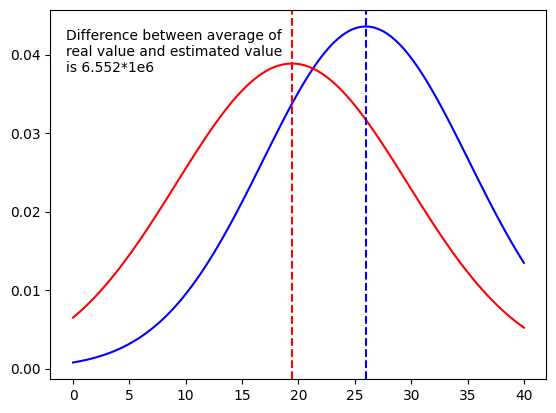

In [28]:
fig, ax = plt.subplots()
highway = stats.norm.pdf(x, np.mean(data['highway08']),  np.std(data['highway08']))
city = stats.norm.pdf(x, np.mean(data['city08']), np.std(data['city08']))
ax.plot(x, highway, 'b', label = 'highway')
ax.plot(x, city, 'r', label = 'city') 
ax.axvline(np.mean(data['highway08']), color = 'b', linestyle= '--' )
ax.axvline(np.mean(data['city08']), color = 'r', linestyle='--')

difference_value = round((np.mean(data['highway08']) - np.mean(data['city08'])),3)
fig.text(0.15,0.75,('Difference between average of\nreal value and estimated value\nis '+str(difference_value)+'*1e6'))